In [9]:
from sample.load_data import add_noise_to_audio
from sample.helpers import get_numpy_data
from sample.constants import DATA_PROCESSED, NOISE_PROCESSED
import matplotlib.pyplot as plt
import librosa.display
import librosa
import numpy as np

In [10]:
# Laden der vorverarbeiteten Rausch- und Audioaufnahmen
noise_numpy = get_numpy_data(NOISE_PROCESSED)
audio_numpy = get_numpy_data(DATA_PROCESSED)

print("Rauschen:",noise_numpy.shape)
print("Audio:",audio_numpy.shape)

Rauschen: (100, 80000)
Audio: (72, 80000)


In [11]:
# Erstellen des Tensors
input_data = add_noise_to_audio(audio_numpy,noise_numpy)
print("Tensor:", input_data.shape)

Tensor: (72, 100, 80000)


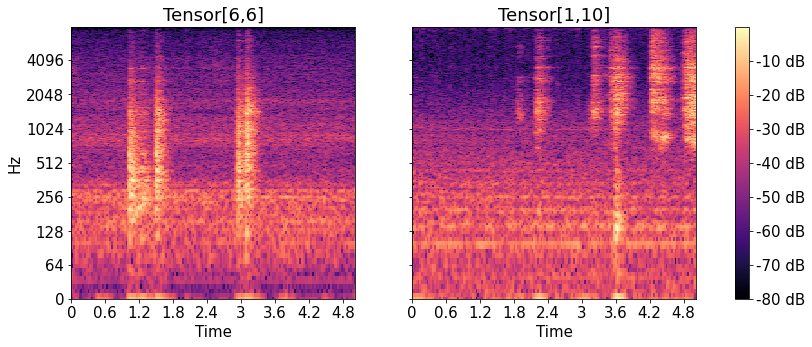

In [12]:
# Sind es die richtigen Daten ?
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

D = librosa.amplitude_to_db(np.abs(librosa.stft(input_data[6,6])), ref=np.max)
img = librosa.display.specshow(D,y_axis="log", x_axis="time",sr=16000,ax=ax[0])
plt.sca(ax[0])
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
plt.title("Tensor[6,6]",size=18)

D_a = librosa.amplitude_to_db(np.abs(librosa.stft(input_data[1,10])), ref=np.max)
img_2 = librosa.display.specshow(D_a,y_axis="log", x_axis="time",sr=16000,ax=ax[1])
plt.sca(ax[1])
plt.xticks(size=15)
plt.yticks(size=15)
ax[1].set_yticklabels([])
ax[1].set_ylabel(None)
plt.xlabel("Time",size=15)
plt.title("Tensor[1,10]",size=18)

# fancy colorbar
cb = fig.colorbar(img,ax=ax,format="%+2.f dB")
for t in cb.ax.get_yticklabels():
    t.set_fontsize(15)

